# Import basic relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Import dataset

In [2]:
dataset = pd.read_csv("true_car_listings_prepeared.csv")

In [3]:
dataset.head(20)

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725.0,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,NaN,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851.0,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922.0,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,0,2016,NaN,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic
5,7989,2012,NaN,Miami,FL,JH4CU2F83CC019895,Acura,TSXAutomatic
6,14490,2014,34032.0,Greatneck,NY,JH4CU2F84EC002686,Acura,TSXSpecial
7,13995,2013,32384.0,West Jordan,UT,JH4CU2F64DC006203,Acura,TSX5-Speed
8,10495,2013,57596.0,Waterbury,CT,19VDE2E50DE000234,Acura,ILX6-Speed
9,9995,2013,63887.0,El Paso,TX,19VDE1F50DE010450,Acura,NaN


In [4]:
# Узнаем размерность нашего датасета
dataset.shape

(852122, 8)

In [5]:
dataset.describe(include = "all")
# Изучаем статистически и в общем плане наши данные
# По статистическому распределению пока что не наблюдаем явных вылетов (кроме нулевой цены), но необходимо дополнительное изучение

,Price,Year,Mileage,City,State,Vin,Make,Model
count,852122.000000,852122.000000,7.311790e+05,852122,852122,852122,852122,775000
unique,NaN,NaN,NaN,2553,59,852075,58,2694
top,NaN,NaN,NaN,Houston,TX,1G1JC6SH8E4194609,Ford,Silverado
freq,NaN,NaN,NaN,12703,94654,2,110432,22558
mean,20121.167199,2013.289145,5.251923e+04,NaN,NaN,NaN,NaN,NaN
std,14123.100298,3.414987,4.203614e+04,NaN,NaN,NaN,NaN,NaN
min,0.000000,1997.000000,5.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,11997.000000,2012.000000,2.383600e+04,NaN,NaN,NaN,NaN,NaN
50%,17900.000000,2014.000000,4.026500e+04,NaN,NaN,NaN,NaN,NaN
75%,26397.000000,2016.000000,7.222700e+04,NaN,NaN,NaN,NaN,NaN


# Preprocessing - Numerical

In [6]:
# Проанализируем пустые значения в нашем датасете и подумаем по поводу способа, как их скоррективровать под нашу модель
dataset.isnull().sum()

Price           0
Year            0
Mileage    120943
City            0
State           0
Vin             0
Make            0
Model       77122
dtype: int64

In [7]:
# Пустые значения наблюдаем в столбцах Mileage и Model. Удельный вес пустых значений в Mileage - 120943/852122 = 14%
# Удельный вес пустых значений в Model - 120943/852122 = 9%
# Если бы удельный вес был бы в районе 1-5%, то можно было бы, как вариант, просто удалить эти данные, но нужен другой способ.

In [8]:
# Сделаем 1 точку сохранения в нашем датасете
dataset_no_preprocessed = dataset.copy()

In [9]:
dataset_no_preprocessed["Mileage"]

0         35725.0
1             NaN
2         48851.0
3         39922.0
4             NaN
           ...   
852117        9.0
852118     3201.0
852119    28941.0
852120     3005.0
852121     2502.0
Name: Mileage, Length: 852122, dtype: float64

In [10]:
# Заменим все пустые значения в столбце Mileage на средние значения
data_preprocess_correct_mileage = dataset_no_preprocessed.fillna(value = {"Mileage": dataset_no_preprocessed["Mileage"].mean()})

In [11]:
data_preprocess_correct_mileage["Mileage"]
# Для уверенности проверили соответствие корректировок по столбцу Mileage

0         35725.000000
1         52519.225188
2         48851.000000
3         39922.000000
4         52519.225188
              ...     
852117        9.000000
852118     3201.000000
852119    28941.000000
852120     3005.000000
852121     2502.000000
Name: Mileage, Length: 852122, dtype: float64

In [12]:
data_preprocess_correct_mileage.isnull().sum()

Price          0
Year           0
Mileage        0
City           0
State          0
Vin            0
Make           0
Model      77122
dtype: int64

In [13]:
# Столбец Model лучше всего будет удалить из модели, так как в нем 2694 уникальных значения
# Используя One Hot Encoding мы многократно усложним модель созданием огромного количества дополнительных переменных
# Аналогичные выводы касательно переменной City c 2553 уникальными значениями
# Также с логической точки зрения столбец Vin не несет никакого полезного смысла для нашей модели, так как его номер практически полностью уникальный
data_preprocessed_1version = data_preprocess_correct_mileage.drop(["Model", "Vin", "City"], axis = 1)
data_preprocessed_1version

,Price,Year,Mileage,State,Make
0,8995,2014,35725.000000,TX,Acura
1,10888,2013,52519.225188,NY,Acura
2,8995,2013,48851.000000,TX,Acura
3,10999,2014,39922.000000,CO,Acura
4,0,2016,52519.225188,UT,Acura
...,...,...,...,...,...
852117,63215,2017,9.000000,CA,Volvo
852118,72260,2017,3201.000000,NJ,Volvo
852119,55999,2016,28941.000000,CO,Volvo
852120,60240,2017,3005.000000,CA,Volvo


In [14]:
data_preprocessed_1version.describe(include = "all")

,Price,Year,Mileage,State,Make
count,852122.000000,852122.000000,8.521220e+05,852122,852122
unique,NaN,NaN,NaN,59,58
top,NaN,NaN,NaN,TX,Ford
freq,NaN,NaN,NaN,94654,110432
mean,20121.167199,2013.289145,5.251923e+04,NaN,NaN
std,14123.100298,3.414987,3.893891e+04,NaN,NaN
min,0.000000,1997.000000,5.000000e+00,NaN,NaN
25%,11997.000000,2012.000000,2.669300e+04,NaN,NaN
50%,17900.000000,2014.000000,4.680700e+04,NaN,NaN
75%,26397.000000,2016.000000,6.447400e+04,NaN,NaN


<AxesSubplot:xlabel='Price'>

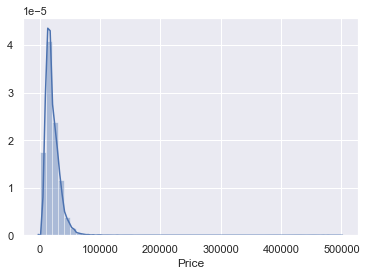

In [15]:
# Изучим более подробно статистическое распределение значений цены
sns.distplot(data_preprocessed_1version['Price'])

In [16]:
# Решаем проблему нулевой цены (цена машины 0 - явно не имеет никакого смысла и это ошибка)
# По аналогии с Mileage, заменим нули на среднее значение
data_preprocessed_1version.loc[:, "Price"][data_preprocessed_1version["Price"] == 0] = np.nan
data_preprocessed_2version = data_preprocessed_1version.fillna(value = {"Price" : data_preprocessed_1version["Price"].mean()})

C:\Users\93ttt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
data_preprocessed_2version.describe(include = "all")

,Price,Year,Mileage,State,Make
count,852122.000000,852122.000000,8.521220e+05,852122,852122
unique,NaN,NaN,NaN,59,58
top,NaN,NaN,NaN,TX,Ford
freq,NaN,NaN,NaN,94654,110432
mean,21463.931824,2013.289145,5.251923e+04,NaN,NaN
std,13131.791150,3.414987,3.893891e+04,NaN,NaN
min,1500.000000,1997.000000,5.000000e+00,NaN,NaN
25%,13600.250000,2012.000000,2.669300e+04,NaN,NaN
50%,19245.000000,2014.000000,4.680700e+04,NaN,NaN
75%,26397.000000,2016.000000,6.447400e+04,NaN,NaN


<AxesSubplot:xlabel='Price'>

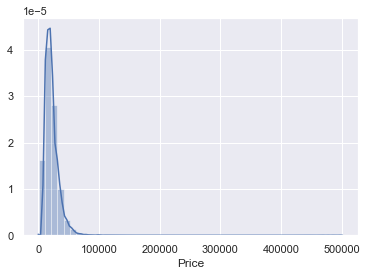

In [18]:
sns.distplot(data_preprocessed_2version['Price'])

In [19]:
# Наблюдаем выбросы по цене, которые в будущем могут нам значительно ухудшить нашу модель
# Используем квантиль чтобы скорректировать наше распределение цены еще ближе к нормальному
q = data_preprocessed_2version['Price'].quantile(0.99)
data_preprocessed_3version = data_preprocessed_2version[data_preprocessed_2version['Price']<q]
data_preprocessed_3version.describe(include='all')

,Price,Year,Mileage,State,Make
count,843589.000000,843589.000000,8.435890e+05,843589,843589
unique,NaN,NaN,NaN,59,58
top,NaN,NaN,NaN,TX,Ford
freq,NaN,NaN,NaN,93246,110006
mean,20772.432953,2013.271529,5.283265e+04,NaN,NaN
std,10196.479657,3.417364,3.894069e+04,NaN,NaN
min,1500.000000,1997.000000,5.000000e+00,NaN,NaN
25%,13532.000000,2012.000000,2.706100e+04,NaN,NaN
50%,18999.000000,2014.000000,4.718600e+04,NaN,NaN
75%,25994.000000,2016.000000,6.498500e+04,NaN,NaN


<AxesSubplot:xlabel='Price'>

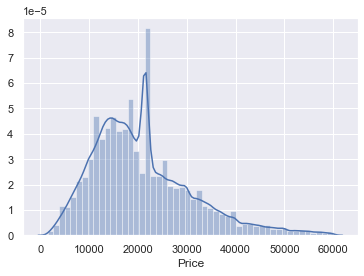

In [20]:
sns.distplot(data_preprocessed_3version['Price'])

<AxesSubplot:xlabel='Year'>

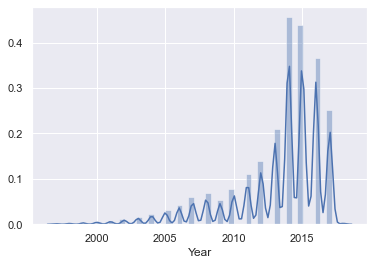

In [21]:
# Посмотрим на распределение других числовых переменных
sns.distplot(data_preprocessed_3version['Year'])

<AxesSubplot:xlabel='Year'>

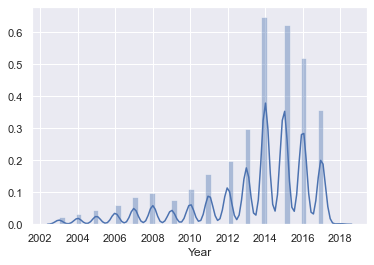

In [22]:
# Уберем из выборки данные раньше 2002 года для коррекции распределения наших данных
# Метод квантиля здесь не подойдет корректно, так как у нас не сильно много уникальных значений
data_preprocessed_4version = data_preprocessed_3version[data_preprocessed_3version['Year']>2002]
sns.distplot(data_preprocessed_4version['Year'])

In [23]:
data_preprocessed_4version.describe(include='all')

,Price,Year,Mileage,State,Make
count,832709.000000,832709.000000,8.327090e+05,832709,832709
unique,NaN,NaN,NaN,59,55
top,NaN,NaN,NaN,TX,Ford
freq,NaN,NaN,NaN,92393,108036
mean,20940.073568,2013.438188,5.184965e+04,NaN,NaN
std,10126.908056,3.106156,3.736084e+04,NaN,NaN
min,1500.000000,2003.000000,5.000000e+00,NaN,NaN
25%,13800.000000,2012.000000,2.681300e+04,NaN,NaN
50%,19250.000000,2014.000000,4.650800e+04,NaN,NaN
75%,25998.000000,2016.000000,6.358700e+04,NaN,NaN


<AxesSubplot:xlabel='Mileage'>

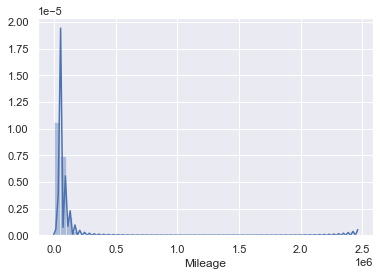

In [24]:
# Коррректировка по году вышла достаточно хорошей, мы потеряли всего лишь 843589-832709=10880 данных, 
# что составляет немного более 1% нашего датасета
# Посмотрим теперь на распределение пробега
sns.distplot(data_preprocessed_4version['Mileage'])

In [25]:
# При помощи квантиля также подкорректируем данные по пробегу ближе к нормальному распределению
q = data_preprocessed_4version['Mileage'].quantile(0.99)
data_preprocessed_polufinal = data_preprocessed_4version[data_preprocessed_4version['Mileage']<q]
data_preprocessed_polufinal.describe(include='all')

,Price,Year,Mileage,State,Make
count,824381.000000,824381.000000,824381.000000,824381,824381
unique,NaN,NaN,NaN,59,55
top,NaN,NaN,NaN,TX,Ford
freq,NaN,NaN,NaN,91426,106551
mean,21054.707423,2013.509275,50268.426503,NaN,NaN
std,10094.038752,3.028900,33299.143634,NaN,NaN
min,1500.000000,2003.000000,5.000000,NaN,NaN
25%,13914.000000,2012.000000,26612.000000,NaN,NaN
50%,19477.000000,2014.000000,45976.000000,NaN,NaN
75%,26047.000000,2016.000000,62101.000000,NaN,NaN


<AxesSubplot:xlabel='Mileage'>

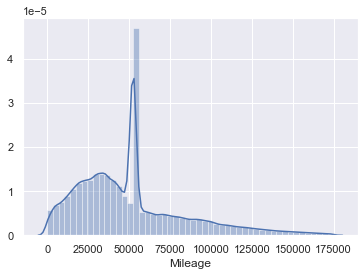

In [26]:
sns.distplot(data_preprocessed_polufinal['Mileage'])

<AxesSubplot:xlabel='Year', ylabel='Price'>

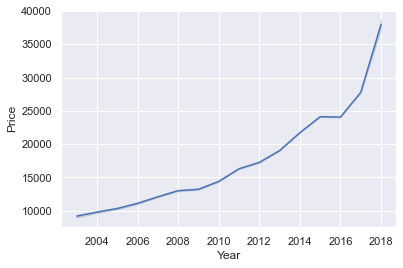

In [27]:
# Посмотрим на график зависимости между ценой и годом производства машины
# Вывод - чем новее машина, тем выше цена, зависимость прямопропорциональна
sns.lineplot(data_preprocessed_polufinal['Year'], data_preprocessed_polufinal['Price'])

# Preprocessing - Categorical

In [28]:
# Рассмотрим уникальные значения столбца State
pd.unique(data_preprocessed_polufinal["State"])

array([' TX', ' NY', ' CO', ' UT', ' FL', ' CT', ' ID', ' ND', ' CA',
       ' NJ', ' OH', ' VA', ' IN', ' AZ', ' OR', ' KS', ' NE', ' MA',
       ' MD', ' GA', ' MN', ' HI', ' LA', ' NM', ' IL', ' AL', ' PA',
       ' SC', ' NC', ' WA', ' WI', ' OK', ' KY', ' MS', ' MO', ' ME',
       ' AR', ' MI', ' NV', ' TN', ' Fl', ' NH', ' DE', ' WV', ' Az',
       ' VT', ' SD', ' IA', ' RI', ' ga', ' Oh', ' MT', ' DC', ' AK',
       ' Va', ' WY', ' Md', ' Ca', ' Ga'], dtype=object)

In [29]:
# Первое что бросается в глаза, - это ошибки с регистром в списке сокращений штата - итого у нас появилось лишних 8 значений: 
# ga, Az, Oh, Va, Md, Ca, Ga, Fl
# Заменим их при помощи метода upper
data_preprocessed_polufinal.loc[:, "State"] = data_preprocessed_polufinal.loc[:, "State"].str.upper()

C:\Users\93ttt\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [30]:
pd.unique(data_preprocessed_polufinal["State"])

array([' TX', ' NY', ' CO', ' UT', ' FL', ' CT', ' ID', ' ND', ' CA',
       ' NJ', ' OH', ' VA', ' IN', ' AZ', ' OR', ' KS', ' NE', ' MA',
       ' MD', ' GA', ' MN', ' HI', ' LA', ' NM', ' IL', ' AL', ' PA',
       ' SC', ' NC', ' WA', ' WI', ' OK', ' KY', ' MS', ' MO', ' ME',
       ' AR', ' MI', ' NV', ' TN', ' NH', ' DE', ' WV', ' VT', ' SD',
       ' IA', ' RI', ' MT', ' DC', ' AK', ' WY'], dtype=object)

In [31]:
# Сделаем аналогичную проверку по переменной Make
pd.unique(data_preprocessed_polufinal["Make"])

array(['Acura', 'Alfa', 'Aston', 'Audi', 'Bentley', 'BMW', 'Buick',
       'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'Ferrari', 'FIAT',
       'Fisker', 'Ford', 'Freightliner', 'Genesis', 'GMC', 'Honda',
       'HUMMER', 'Hyundai', 'INFINITI', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
       'Lamborghini', 'Land', 'Lexus', 'Lincoln', 'Lotus', 'Maserati',
       'Maybach', 'Mazda', 'McLaren', 'Mercedes-Benz', 'Mercury', 'MINI',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Pontiac', 'Porsche', 'Ram',
       'Rolls-Royce', 'Saab', 'Saturn', 'Scion', 'smart', 'Subaru',
       'Suzuki', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [32]:
# По столбцу Make не наблюдаем дубликатов, поэтому все нормально
# Наш датасет теперь имеет намного меньше логических ошибок, перейдем к построению регрессии без категориальных данных для начала
# чтобы потом увидеть более наглядно, изменение точности нашей модели при введении категориальных данных State и Make

# Linear Regression without categorical data - 1 Stage

In [33]:
# Выполним линейную регрессию, используя только переменную Year
data_preprocessed_final_without_categorical1 = data_preprocessed_polufinal.drop(["State", "Make", "Mileage"], axis = 1)
data_preprocessed_final_without_categorical1

,Price,Year
0,8995.000000,2014
1,10888.000000,2013
2,8995.000000,2013
3,10999.000000,2014
4,21463.931824,2016
...,...,...
852111,46500.000000,2017
852112,46530.000000,2017
852114,53855.000000,2017
852116,54995.000000,2017


In [34]:
X1 = data_preprocessed_final_without_categorical1.iloc[:, -1].values
y1 = data_preprocessed_final_without_categorical1.iloc[:, 0].values

In [35]:
X1

array([2014, 2013, 2013, ..., 2017, 2017, 2016], dtype=int64)

In [36]:
y1

array([ 8995., 10888.,  8995., ..., 53855., 54995., 55999.])

In [37]:
# Разделим наш датасет на тренировочный и тестовый
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.30, random_state = 42)

In [38]:
# Тренируем нашу модель на тренировочном датасете, используем множественную линейную регрессию
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X_train1.reshape(-1,1), y_train1)

LinearRegression()

In [39]:
regressor1.score(X_train1.reshape(-1,1), y_train1)

0.20636988983543914

In [40]:
regressor1.fit(X_test1.reshape(-1,1), y_test1)

LinearRegression()

In [41]:
regressor1.score(X_test1.reshape(-1,1), y_test1)

0.20676282439320037

In [42]:
# Точность нашей модели составляет порядка 21%
# Проверим ниже как изменится наша модель, если ввести еще перменную пробега машины

# Linear Regression without categorical data - 2 Stage

In [43]:
data_preprocessed_final_without_categorical2 = data_preprocessed_polufinal.drop(["State", "Make"], axis = 1)
data_preprocessed_final_without_categorical2

,Price,Year,Mileage
0,8995.000000,2014,35725.000000
1,10888.000000,2013,52519.225188
2,8995.000000,2013,48851.000000
3,10999.000000,2014,39922.000000
4,21463.931824,2016,52519.225188
...,...,...,...
852111,46500.000000,2017,8.000000
852112,46530.000000,2017,10.000000
852114,53855.000000,2017,7530.000000
852116,54995.000000,2017,2474.000000


In [44]:
X2 = data_preprocessed_final_without_categorical2.iloc[:, 1:].values
y2 = data_preprocessed_final_without_categorical2.iloc[:, 0].values

In [45]:
X2

array([[ 2014.        , 35725.        ],
       [ 2013.        , 52519.22518836],
       [ 2013.        , 48851.        ],
       ...,
       [ 2017.        ,  7530.        ],
       [ 2017.        ,  2474.        ],
       [ 2016.        , 28941.        ]])

In [46]:
y2

array([ 8995., 10888.,  8995., ..., 53855., 54995., 55999.])

In [47]:
# Разделим наш датасет на тренировочный и тестовый
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.30, random_state = 42)

In [48]:
X_train2

array([[ 2015., 23993.],
       [ 2015., 22782.],
       [ 2017., 17434.],
       ...,
       [ 2017., 15689.],
       [ 2016.,  5277.],
       [ 2010., 50740.]])

In [49]:
y_train2

array([21789.        , 15400.        , 21463.93182393, ...,
       26600.        , 35982.        , 15995.        ])

In [50]:
# Тренируем нашу модель на тренировочном датасете, используем множественную линейную регрессию
from sklearn.linear_model import LinearRegression
regressor2 = LinearRegression()
regressor2.fit(X_train2, y_train2)

LinearRegression()

In [51]:
regressor2.score(X_train2, y_train2)

0.22834251258819072

In [52]:
regressor2.fit(X_test2, y_test2)

LinearRegression()

In [53]:
regressor2.score(X_test2, y_test2)

0.22900192698692945

In [54]:
# Точность нашей модели при введении дополнительной переменной пробега увеличилась всего лишь на 2%, с 21% до 23%
# Это на первый взгляд скорее всего свидетельствует о малой значимости введенной переменной, но думаю причина в другом -
# Эта переменная предполагаю что сильно коррелирует с переменной год (логично что чем старше машина, тем больше у нее пробег)
# Чтобы подтвердить наши выводы, построим матрицу корреляций переменных

<AxesSubplot:>

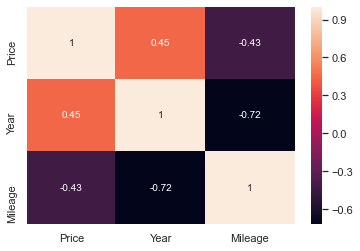

In [55]:
sns.heatmap(data_preprocessed_polufinal.corr(), annot=True)
# Связь больше 0,7 между годом и пробегом указывает на сильную корреляцию между переменными

In [56]:
# Начнем вводить категориальные признаки, чтобы улучшить точность нашей модели

# Linear Regression with categorical data - 1 Stage

In [57]:
# Вначале введем дополнительно переменную Make, и посмотрим на наши изменения
# Логически рассуждая, производитель машины - это фактор, который должен значительно влиять на нашу модель
# Чтобы это сработало, трансформируем нашу категориальную переменную в числовые значения, чтобы компьютер смог понять ее
# Используем для этого методику One Hot Encoding
data_preprocessed_final_with_state = data_preprocessed_polufinal.drop(["State"], axis = 1)
data_preprocessed_final_with_state

,Price,Year,Mileage,Make
0,8995.000000,2014,35725.000000,Acura
1,10888.000000,2013,52519.225188,Acura
2,8995.000000,2013,48851.000000,Acura
3,10999.000000,2014,39922.000000,Acura
4,21463.931824,2016,52519.225188,Acura
...,...,...,...,...
852111,46500.000000,2017,8.000000,Volvo
852112,46530.000000,2017,10.000000,Volvo
852114,53855.000000,2017,7530.000000,Volvo
852116,54995.000000,2017,2474.000000,Volvo


In [58]:
data_with_dummies1 = pd.get_dummies(data_preprocessed_final_with_state, drop_first=True)
# Первое наименование в категории мы уберем, чтобы избежать мультиколлинеарности (это у нас будет Make Acura)

In [59]:
data_with_dummies1

,Price,Year,Mileage,Make_Alfa,Make_Aston,Make_Audi,Make_BMW,Make_Bentley,Make_Buick,Make_Cadillac,...,Make_Saab,Make_Saturn,Make_Scion,Make_Subaru,Make_Suzuki,Make_Tesla,Make_Toyota,Make_Volkswagen,Make_Volvo,Make_smart
0,8995.000000,2014,35725.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10888.000000,2013,52519.225188,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8995.000000,2013,48851.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10999.000000,2014,39922.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21463.931824,2016,52519.225188,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852111,46500.000000,2017,8.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
852112,46530.000000,2017,10.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
852114,53855.000000,2017,7530.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
852116,54995.000000,2017,2474.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [60]:
# Еще раз проверим дополнительно по наименованиям столбцов, все ли правильно у нас получилось
data_with_dummies1.columns.values

array(['Price', 'Year', 'Mileage', 'Make_Alfa', 'Make_Aston', 'Make_Audi',
       'Make_BMW', 'Make_Bentley', 'Make_Buick', 'Make_Cadillac',
       'Make_Chevrolet', 'Make_Chrysler', 'Make_Dodge', 'Make_FIAT',
       'Make_Ferrari', 'Make_Fisker', 'Make_Ford', 'Make_Freightliner',
       'Make_GMC', 'Make_Genesis', 'Make_HUMMER', 'Make_Honda',
       'Make_Hyundai', 'Make_INFINITI', 'Make_Isuzu', 'Make_Jaguar',
       'Make_Jeep', 'Make_Kia', 'Make_Lamborghini', 'Make_Land',
       'Make_Lexus', 'Make_Lincoln', 'Make_Lotus', 'Make_MINI',
       'Make_Maserati', 'Make_Maybach', 'Make_Mazda', 'Make_McLaren',
       'Make_Mercedes-Benz', 'Make_Mercury', 'Make_Mitsubishi',
       'Make_Nissan', 'Make_Oldsmobile', 'Make_Pontiac', 'Make_Porsche',
       'Make_Ram', 'Make_Rolls-Royce', 'Make_Saab', 'Make_Saturn',
       'Make_Scion', 'Make_Subaru', 'Make_Suzuki', 'Make_Tesla',
       'Make_Toyota', 'Make_Volkswagen', 'Make_Volvo', 'Make_smart'],
      dtype=object)

In [61]:
y3 = data_with_dummies1['Price']
X3 = data_with_dummies1.drop(['Price'],axis=1)

In [62]:
y3

0          8995.000000
1         10888.000000
2          8995.000000
3         10999.000000
4         21463.931824
              ...     
852111    46500.000000
852112    46530.000000
852114    53855.000000
852116    54995.000000
852119    55999.000000
Name: Price, Length: 824381, dtype: float64

In [63]:
X3

,Year,Mileage,Make_Alfa,Make_Aston,Make_Audi,Make_BMW,Make_Bentley,Make_Buick,Make_Cadillac,Make_Chevrolet,...,Make_Saab,Make_Saturn,Make_Scion,Make_Subaru,Make_Suzuki,Make_Tesla,Make_Toyota,Make_Volkswagen,Make_Volvo,Make_smart
0,2014,35725.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2013,52519.225188,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2013,48851.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2014,39922.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2016,52519.225188,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852111,2017,8.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
852112,2017,10.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
852114,2017,7530.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
852116,2017,2474.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [64]:
# Разделим наш датасет на тренировочный и тестовый
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.30, random_state = 42)

In [65]:
# Тренируем нашу модель на тренировочном датасете, используем множественную линейную регрессию
from sklearn.linear_model import LinearRegression
regressor3 = LinearRegression()
regressor3.fit(X_train3, y_train3)

LinearRegression()

In [66]:
regressor3.score(X_train3, y_train3)

0.4310181917699356

In [67]:
regressor3.fit(X_test3, y_test3)

LinearRegression()

In [68]:
regressor3.score(X_test3, y_test3)

0.4345375475735601

In [69]:
# Точность нашей модели повысилась почти в два раза, с 23% до 43%. 
# Безусловно, переменная производителя значима для нашей модели и улучшает ее точность

# Linear Regression with categorical data - 2 Stage

In [70]:
# Теперь добавим еще категориальную перменную State и посмотрим как изменится наша модель

In [71]:
data_preprocessed_final_all = data_preprocessed_polufinal.copy()
data_preprocessed_final_all

,Price,Year,Mileage,State,Make
0,8995.000000,2014,35725.000000,TX,Acura
1,10888.000000,2013,52519.225188,NY,Acura
2,8995.000000,2013,48851.000000,TX,Acura
3,10999.000000,2014,39922.000000,CO,Acura
4,21463.931824,2016,52519.225188,UT,Acura
...,...,...,...,...,...
852111,46500.000000,2017,8.000000,CA,Volvo
852112,46530.000000,2017,10.000000,CA,Volvo
852114,53855.000000,2017,7530.000000,GA,Volvo
852116,54995.000000,2017,2474.000000,PA,Volvo


In [72]:
data_with_dummies2 = pd.get_dummies(data_preprocessed_final_all, drop_first=True)
# Первые наименования в категориях мы уберем, чтобы избежать мультиколлинеарности (это у нас будет State AK и Make Acura)

In [73]:
data_with_dummies2

,Price,Year,Mileage,State_ AL,State_ AR,State_ AZ,State_ CA,State_ CO,State_ CT,State_ DC,...,Make_Saab,Make_Saturn,Make_Scion,Make_Subaru,Make_Suzuki,Make_Tesla,Make_Toyota,Make_Volkswagen,Make_Volvo,Make_smart
0,8995.000000,2014,35725.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10888.000000,2013,52519.225188,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8995.000000,2013,48851.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10999.000000,2014,39922.000000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21463.931824,2016,52519.225188,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852111,46500.000000,2017,8.000000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
852112,46530.000000,2017,10.000000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
852114,53855.000000,2017,7530.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
852116,54995.000000,2017,2474.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [74]:
# Еще раз проверим дополнительно по наименованиям столбцов, все ли правильно у нас получилось
data_with_dummies2.columns.values

array(['Price', 'Year', 'Mileage', 'State_ AL', 'State_ AR', 'State_ AZ',
       'State_ CA', 'State_ CO', 'State_ CT', 'State_ DC', 'State_ DE',
       'State_ FL', 'State_ GA', 'State_ HI', 'State_ IA', 'State_ ID',
       'State_ IL', 'State_ IN', 'State_ KS', 'State_ KY', 'State_ LA',
       'State_ MA', 'State_ MD', 'State_ ME', 'State_ MI', 'State_ MN',
       'State_ MO', 'State_ MS', 'State_ MT', 'State_ NC', 'State_ ND',
       'State_ NE', 'State_ NH', 'State_ NJ', 'State_ NM', 'State_ NV',
       'State_ NY', 'State_ OH', 'State_ OK', 'State_ OR', 'State_ PA',
       'State_ RI', 'State_ SC', 'State_ SD', 'State_ TN', 'State_ TX',
       'State_ UT', 'State_ VA', 'State_ VT', 'State_ WA', 'State_ WI',
       'State_ WV', 'State_ WY', 'Make_Alfa', 'Make_Aston', 'Make_Audi',
       'Make_BMW', 'Make_Bentley', 'Make_Buick', 'Make_Cadillac',
       'Make_Chevrolet', 'Make_Chrysler', 'Make_Dodge', 'Make_FIAT',
       'Make_Ferrari', 'Make_Fisker', 'Make_Ford', 'Make_Freightliner'

In [75]:
y4 = data_with_dummies2['Price']
X4 = data_with_dummies2.drop(['Price'],axis=1)

In [76]:
y4

0          8995.000000
1         10888.000000
2          8995.000000
3         10999.000000
4         21463.931824
              ...     
852111    46500.000000
852112    46530.000000
852114    53855.000000
852116    54995.000000
852119    55999.000000
Name: Price, Length: 824381, dtype: float64

In [77]:
X4

,Year,Mileage,State_ AL,State_ AR,State_ AZ,State_ CA,State_ CO,State_ CT,State_ DC,State_ DE,...,Make_Saab,Make_Saturn,Make_Scion,Make_Subaru,Make_Suzuki,Make_Tesla,Make_Toyota,Make_Volkswagen,Make_Volvo,Make_smart
0,2014,35725.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2013,52519.225188,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2013,48851.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2014,39922.000000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2016,52519.225188,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852111,2017,8.000000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
852112,2017,10.000000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
852114,2017,7530.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
852116,2017,2474.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [78]:
# Разделим наш датасет на тренировочный и тестовый
from sklearn.model_selection import train_test_split
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size = 0.30, random_state = 42)

In [79]:
# Тренируем нашу модель на тренировочном датасете, используем множественную линейную регрессию
from sklearn.linear_model import LinearRegression
regressor4 = LinearRegression()
regressor4.fit(X_train4, y_train4)

LinearRegression()

In [80]:
regressor4.score(X_train4, y_train4)

0.4391249628706464

In [81]:
regressor4.fit(X_test4, y_test4)

LinearRegression()

In [82]:
regressor4.score(X_test4, y_test4)

0.44286514796352416

In [83]:
# Точность нашей модели увеличилась всего лишь на 1%, до 44%, поэтому можно сделать вывод, что переменная State является не значимой для нашей модели
# Самые значимые факторы - это год и производитель. Пробег не учитываем, так как он достаточно сильно коррелирует с переменной год производства машины